In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# Inspect data
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [7]:
# Reflect an existing database into a new model
Base = automap_base()

# Reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# View all of the classes that automap found
Measurement = Base.classes.measurement
Station = Base.classes.station
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [10]:
# Check first 10 rows of Measurements
engine.execute('SELECT * FROM Measurement LIMIT 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

Text(0, 0.5, 'Precipitation')

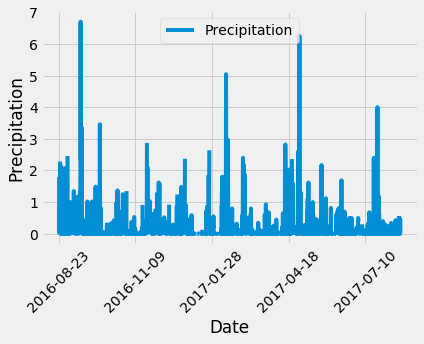

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017, 8 ,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_ago).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
new_df = pd.DataFrame(data, columns=['Date', 'Precipitation'])

# Sort the dataframe by date
new_df = new_df.sort_values(by="Date")
new_df.reset_index(drop=True)

# Use Pandas Plotting with Matplotlib to plot the data
new_df.plot("Date", "Precipitation", rot = 45)
plt.xlabel("Date")
plt.ylabel("Precipitation")

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
new_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number stations in the dataset
session.query(func.count(Station.station)).all()

[(9)]

In [14]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_count = session.query(Measurement.station, func.count(Measurement.station)).\
        group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
station_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs),
            func.max(Measurement.tobs),
            func.avg(Measurement.tobs)).\
            filter(Measurement.station == "USC00519281").all()

[(54.0, 85.0, 71.66378066378067)]

In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# Find recent date
session.query(func.max(Measurement.date)).\
            filter(Measurement.station == "USC00519281").first()

('2017-08-18')

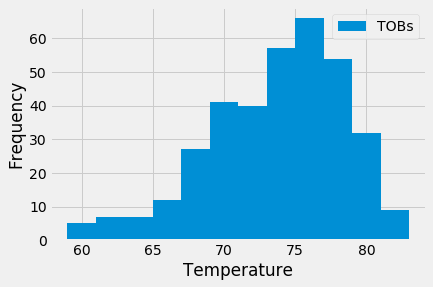

In [17]:
# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017, 8 ,18) - dt.timedelta(days=365)
# year_ago

# Temperature
temp = session.query(Measurement.date, Measurement.tobs).\
                    filter(Measurement.date >= year_ago).\
                    filter(Measurement.station == "USC00519281").all()

# Save the query results as a Pandas DataFrame
temp_df = pd.DataFrame(temp, columns=['Date', 'TOBs'])
temp_df

# Plot histogram
plt.hist(temp_df["TOBs"], bins = 12, label = "TOBs")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Close session

In [18]:
# Close Session
session.close()